## Yelp reviews analysis

STAT 628 Group 13:\
Yike Wang\
Yuhan Zhou\
Jonquil Liao

### 1. Import the data

In [7]:
import pandas as pd
review = pd.read_json('/Users/zhonglingliao/Desktop/stat628/module3/Data/review_city.json', lines=True)
business = pd.read_json('/Users/zhonglingliao/Desktop/stat628/module3/Data/business_city.json', lines=True)

In [8]:
df_raw = pd.merge(review, business, how='left', on='business_id')
df = df_raw.drop(columns=[ 'review_id', 'user_id', 'funny', 'cool', 'date', 'latitude', 'longitude', 'is_open', 'review_count', 'hours'])

In [9]:
df.head()

,business_id,stars_x,useful,text,name,address,city,state,postal_code,stars_y,attributes,categories
0,HQl28KMwrEKHqhFrrDqVNQ,5,1,I love Deagan's. I do. I really do. The atmosp...,Deagan's Kitchen & Bar,14810 Detroit Ave,Lakewood,OH,44107,4.0,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (..."
1,ZlCSsWS07JulSBIQlrbF5w,5,1,Called for a 5:15 morning reservation. The dri...,Black Cab & Limo,,Champaign,IL,,4.5,{'WiFi': 'u'free''},"Airport Shuttles, Transportation, Taxis, Hotel..."
2,oVuZtlCFg_zF090Nhtp0Ow,4,3,A close friend was in town and so instead of t...,Choolaah Indian BBQ,6114 Centre Ave,Pittsburgh,PA,15206,4.0,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Indian, Vegetarian, Vegan, Gluten..."
3,wSAGILK2CFbq5BVZ5D67-A,3,0,The service is attentive. The decor attractive...,Adega,2017 E 9th St,Cleveland,OH,44115,4.0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Mediterranean, Hotels, Beer, Wine & Spirits, B..."
4,oCvxJBOs-Mbg-4oanPO7lQ,4,0,The ingredients are always fresh and I like th...,Pita Pit,2763 East Carson St,Pittsburgh,PA,15203,3.5,"{'RestaurantsPriceRange2': '1', 'RestaurantsAt...","Fast Food, Greek, Breakfast & Brunch, Restaura..."


### 2. Choose the Business

#### We plan to focus on business type 'Steakhouse', so here we pick out the businesses only in category 'Steakhouse'.

In [10]:
data = df[df['categories'].str.contains('Steakhouse',na=False)]

In [11]:
data.head()

,business_id,stars_x,useful,text,name,address,city,state,postal_code,stars_y,attributes,categories
169,VGxJbglGlx-a7Gdc55Q6jQ,1,1,I gave this place 2 chances. i love japanese f...,Katana,3229 W Liberty Ave,Pittsburgh,PA,15216,3.0,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Restaurants, Japanese, Sushi Bars, Chinese, St..."
188,lpxj6LFir23Ds6swW8a6fg,4,0,Very fresh food and authentic Italian taste. T...,Grandview Saloon,1212 Grandview Ave,Pittsburgh,PA,15211,3.0,"{'Alcohol': 'u'full_bar'', 'WiFi': ''free'', '...","Restaurants, Steakhouses, Seafood, American (T..."
219,d6VYQbeTZ_WdD8Uuhh35dg,5,0,This is my favorite happy hour place in all of...,Tempest Oyster Bar,120 E Wilson St,Madison,WI,53703,4.0,"{'RestaurantsTakeOut': 'False', 'WiFi': 'u'no'...","Steakhouses, Restaurants, Bars, Seafood, Night..."
262,szGbmw_vq3kVU4SfK1x6Sw,4,1,Ruth Chris Steakhouse is by far one of the bes...,Ruths Chris Steak House,6 PPG Pl,Pittsburgh,PA,15222,4.0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Steakhouses"
269,ZspvlO5Dvtd517YhVLJJ_A,3,5,"When it comes to Tomo, my biggest suggestions ...",Tomo Sushi & Hibachi,1293 W 9th St,Cleveland,OH,44113,3.0,"{'RestaurantsGoodForGroups': 'True', 'Business...","Sushi Bars, Restaurants, Japanese, Steakhouses"


In [12]:
len(data)

32184

In [13]:
liststeak = {}.fromkeys(data.business_id).keys()
len(liststeak)

354

#### There are around 354 businesses that contains category 'Steakhouse' and 30000 reviews we should work on.

#### Let's take a look at how many reviews  in each rating level.

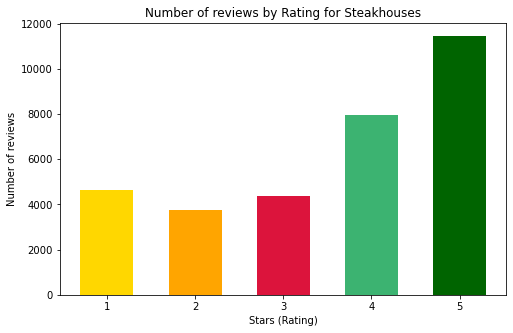

In [14]:
import matplotlib.pyplot as plt
star_x = data.stars_x.value_counts().index
star_y = data.stars_x.value_counts().values
plt.figure(figsize=(8,5))
bar_colors = ['darkgreen', 'mediumseagreen', 'gold', 'crimson', 'orange']
plt.bar(star_x, star_y, color=bar_colors, width=.6)
plt.xlabel('Stars (Rating)')
plt.ylabel('Number of reviews')
plt.title('Number of reviews by Rating for Steakhouses');

#### Let's take a look at how many reviews are there for each rating level.

In [15]:
review_steakhouse = review[review.business_id.isin(data.business_id)]

In [16]:
review_steakhouse.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
169,6GNIVJCqvvPAKXKL3oa9Sg,w1nr-eZ04z-Cq4ErAN2otg,VGxJbglGlx-a7Gdc55Q6jQ,1,1,1,0,I gave this place 2 chances. i love japanese f...,2013-05-08 01:34:24
188,wqwgRouFIAi29XGhSiZoDg,m5ID0Dpz6IxbNPmhgZQyEQ,lpxj6LFir23Ds6swW8a6fg,4,0,0,0,Very fresh food and authentic Italian taste. T...,2014-08-10 20:30:28
219,7vsixeZiFsfGoI7JxTpqLg,URig1W1Y_6P2viLKDx5hkQ,d6VYQbeTZ_WdD8Uuhh35dg,5,0,0,1,This is my favorite happy hour place in all of...,2016-11-09 21:15:28
262,0wceCr75fE63DVC-BxJucQ,jV2JRJT9oSEVzoSkOSqmiQ,szGbmw_vq3kVU4SfK1x6Sw,4,1,0,0,Ruth Chris Steakhouse is by far one of the bes...,2015-01-03 23:44:23
269,R2agv2EUeCooIv0_-3X7YA,u3ZPMVVEzneq8x856WksJQ,ZspvlO5Dvtd517YhVLJJ_A,3,5,0,2,"When it comes to Tomo, my biggest suggestions ...",2016-03-06 23:43:57


In [17]:
data.head()

,business_id,stars_x,useful,text,name,address,city,state,postal_code,stars_y,attributes,categories
169,VGxJbglGlx-a7Gdc55Q6jQ,1,1,I gave this place 2 chances. i love japanese f...,Katana,3229 W Liberty Ave,Pittsburgh,PA,15216,3.0,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Restaurants, Japanese, Sushi Bars, Chinese, St..."
188,lpxj6LFir23Ds6swW8a6fg,4,0,Very fresh food and authentic Italian taste. T...,Grandview Saloon,1212 Grandview Ave,Pittsburgh,PA,15211,3.0,"{'Alcohol': 'u'full_bar'', 'WiFi': ''free'', '...","Restaurants, Steakhouses, Seafood, American (T..."
219,d6VYQbeTZ_WdD8Uuhh35dg,5,0,This is my favorite happy hour place in all of...,Tempest Oyster Bar,120 E Wilson St,Madison,WI,53703,4.0,"{'RestaurantsTakeOut': 'False', 'WiFi': 'u'no'...","Steakhouses, Restaurants, Bars, Seafood, Night..."
262,szGbmw_vq3kVU4SfK1x6Sw,4,1,Ruth Chris Steakhouse is by far one of the bes...,Ruths Chris Steak House,6 PPG Pl,Pittsburgh,PA,15222,4.0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Steakhouses"
269,ZspvlO5Dvtd517YhVLJJ_A,3,5,"When it comes to Tomo, my biggest suggestions ...",Tomo Sushi & Hibachi,1293 W 9th St,Cleveland,OH,44113,3.0,"{'RestaurantsGoodForGroups': 'True', 'Business...","Sushi Bars, Restaurants, Japanese, Steakhouses"


#### Save the review_steakhouse

In [18]:
data.to_csv('review_steakhouse.csv')

#### Then let's take a loot at the length of the reviews.

<ipython-input-19-ce21c0a0adf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_length'] = data.text.map(len)


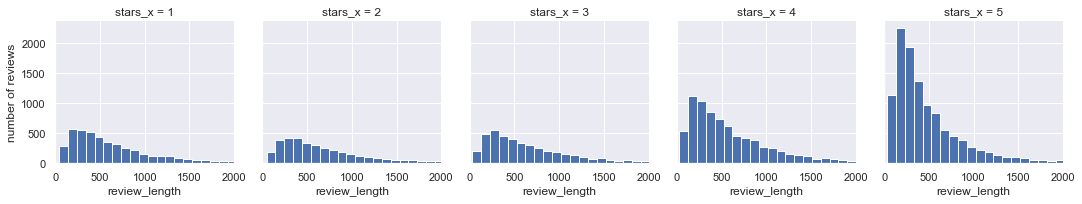

In [19]:
import seaborn as sns
sns.set()
data['review_length'] = data.text.map(len)
ax = sns.FacetGrid(data=data, col='stars_x',xlim=(0, 2000)).map(plt.hist, 'review_length', bins=50)
ax.axes[0][0].set(ylabel='number of reviews');

### 3. Choose the topics

In [20]:
import numpy as np
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re, string
import sys
import time
import collections

In [21]:
import collections
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhonglingliao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
badreviews = data[(data.stars_x <= 2 )]
goodreviews = data[(data.stars_x >= 4)]
badreviews = badreviews.text
goodreviews = goodreviews.text

#### clean the reviews

In [23]:
badreviews = ["".join([char for char in a if char not in string.punctuation]) for a in badreviews]
goodreviews = ["".join([char for char in a if char not in string.punctuation]) for a in goodreviews]

In [24]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhonglingliao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhonglingliao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:
text1=badreviews
text1 = [a.lower() for a in text1]
words1 = [nltk.word_tokenize(a) for a in text1]
filtered_words1 = [[word for word in a if word not in stop_words] for a in words1]
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

In [73]:
text2=goodreviews
text2 = [a.lower() for a in text2]
words2 = [nltk.word_tokenize(a) for a in text2]
filtered_words2 = [[word for word in a if word not in stop_words] for a in words2]

In [115]:
lemmatized_words1 = [[lmtzr.lemmatize(x) for x in a] for a in filtered_words1]
lemmatized_words2 = [[lmtzr.lemmatize(x) for x in a] for a in filtered_words2]

#### Let's use LSA to determine the number of top topics and topics we plan to do further analysis with

#### Firstly, we have to use tfdif algorithm to get the top valuous words in bad/good reviews.

In [67]:
type(lemmatized_words1)

list

In [82]:
badreviews[0]

'I gave this place 2 chances i love japanese food and really wanted to love this place because it is close to home I was underwhelmed the first time and disgusted the second time the food was tasteless and not what the menu stated Soba noodles are not white they are buckwheat and are beige at the lightest and brown at the darkest When I called i had delivery to tell them that I did not get what I ordered I was told that it was correct and I was wrong Food was tasteless and service was Awful Do not waste your money or your time'

In [68]:
lemmatized_words1[0]

['gave',
 'place',
 '2',
 'chance',
 'love',
 'japanese',
 'food',
 'really',
 'wanted',
 'love',
 'place',
 'close',
 'home',
 'underwhelmed',
 'first',
 'time',
 'disgusted',
 'second',
 'time',
 'food',
 'tasteless',
 'menu',
 'stated',
 'soba',
 'noodle',
 'white',
 'buckwheat',
 'beige',
 'lightest',
 'brown',
 'darkest',
 'called',
 'delivery',
 'tell',
 'get',
 'ordered',
 'told',
 'correct',
 'wrong',
 'food',
 'tasteless',
 'service',
 'awful',
 'waste',
 'money',
 'time']

In [116]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
lemmatized_words1=[ ' '.join(map(str, sent)) for sent in lemmatized_words1]
lemmatized_words2=[ ' '.join(map(str, sent)) for sent in lemmatized_words2]


In [117]:
from array import array 

In [122]:
lemmatized_words1[0]

'gave place 2 chance love japanese food really wanted love place close home underwhelmed first time disgusted second time food tasteless menu stated soba noodle white buckwheat beige lightest brown darkest called delivery tell get ordered told correct wrong food tasteless service awful waste money time'

In [121]:
type(lemmatized_words1)

list

In [124]:
tfidf_model1 = TfidfVectorizer(stop_words=stop_words,
                        ngram_range=(1,1))
tfidf_model2 = TfidfVectorizer(stop_words=stop_words, 
                        ngram_range=(1,1))
result1=tfidf_model1.fit_transform(lemmatized_words1)
result2=tfidf_model2.fit_transform(lemmatized_words2)

In [125]:
print(result1)

  (0, 12678)	0.10233264461434136
  (0, 21436)	0.13048395912188518
  (0, 2405)	0.11762368238588518
  (0, 17317)	0.0571542062832208
  (0, 21983)	0.11186883209372551
  (0, 5201)	0.15472032668470975
  (0, 20028)	0.08644633050396013
  (0, 13693)	0.0662856684932291
  (0, 8741)	0.06617644641854305
  (0, 19540)	0.11031868875255849
  (0, 5910)	0.17569600266547244
  (0, 3795)	0.11620792683093026
  (0, 5664)	0.2762240826885306
  (0, 3493)	0.1420970388218675
  (0, 11474)	0.2762240826885306
  (0, 2813)	0.24914157682901583
  (0, 3553)	0.2642398829316392
  (0, 21698)	0.149412374446926
  (0, 13239)	0.15751316167866783
  (0, 18123)	0.24914157682901583
  (0, 18627)	0.15472032668470975
  (0, 12292)	0.08779955646374858
  (0, 19450)	0.2908806722963287
  (0, 17170)	0.11441993716272081
  (0, 6317)	0.1876802024223639
  :	:
  (8420, 6317)	0.1492389171377159
  (8420, 8193)	0.11354375033053747
  (8421, 3479)	0.2925774632215122
  (8421, 18337)	0.3338068665433318
  (8421, 19238)	0.2797513447978519
  (8421, 4823)	0

In [126]:
bad_df = pd.DataFrame(result1.todense(), columns=[tfidf_model1.get_feature_names()])
good_df = pd.DataFrame(result2.todense(), columns=[tfidf_model2.get_feature_names()])
col_means_bad = {}
for col in bad_df:
    col_means_bad[col] = bad_df[col].mean()

col_means_good = {}
for col in good_df:
    col_means_good[col] = good_df[col].mean()
    
top_words = 8

print('Top words in good reviews:')
print(sorted(col_means_good, key=col_means_good.get, reverse=True)[:top_words])

print('Top words in bad reviews:')
print(sorted(col_means_bad, key=col_means_bad.get, reverse=True)[:top_words])

Top words in good reviews:
[('great',), ('food',), ('good',), ('place',), ('service',), ('steak',), ('time',), ('restaurant',)]
Top words in bad reviews:
[('food',), ('steak',), ('service',), ('time',), ('place',), ('good',), ('table',), ('back',)]


#### It looks like the most valuable words in both bad and good reviews are 'food', 'steak','service','time'. So clearly, what customers care most is the courses (ofcourse steaks for steakhouses), food delivery time and customer services. Now it has given us some intuition, let's do further analysis using LSA.

In [130]:
import gensim

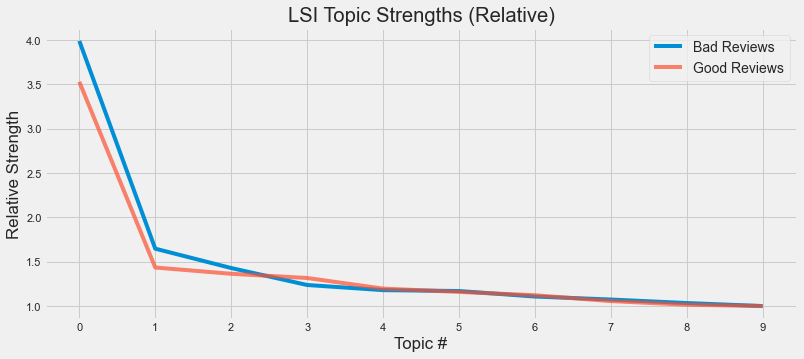

In [131]:
'This part credited to Ankur Vishwakarma, Oakland, CA. https://github.com/Vishwacorp/'
from gensim import corpora, models, similarities, matutils
corpus1 = matutils.Sparse2Corpus(result1.transpose())
corpus2 = matutils.Sparse2Corpus(result2.transpose())
word_bad = dict((v,k) for k,v in tfidf_model1.vocabulary_.items())
word_good = dict((v,k) for k,v in tfidf_model2.vocabulary_.items())
word_bad2 = corpora.Dictionary.from_corpus(corpus1, id2word=word_bad)
word_good2 = corpora.Dictionary.from_corpus(corpus2, id2word=word_good)
lsi_bad = models.LsiModel(corpus1, id2word=word_bad2, num_topics=10)
lsi_good = models.LsiModel(corpus2, id2word=word_good2, num_topics=10)

singular_values_bad = lsi_bad.projection.s.tolist()
singular_values_bad_rel = [sv/singular_values_bad[-1] for sv in singular_values_bad]
singular_values_good = lsi_good.projection.s.tolist()
singular_values_good_rel = [sv/singular_values_good[-1] for sv in singular_values_good]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
plt.plot(range(len(singular_values_bad)), singular_values_bad_rel, label='Bad Reviews', alpha=1.0)
plt.plot(range(len(singular_values_good)), singular_values_good_rel, label='Good Reviews', alpha=0.7)
plt.xticks(range(len(singular_values_bad)), range(len(singular_values_bad)))
plt.xlabel('Topic #')
plt.ylabel('Relative Strength')
plt.title('LSI Topic Strengths (Relative)')
plt.legend(loc=0, fontsize='medium');

#### from the above plot, we can see the it is decent to choose topic number as 4.

#### Let's see roughly what are these topics:

#### Top topics in bad reviews:

In [140]:
import pprint
from pprint import pprint

In [141]:
pprint(lsi_bad.show_topics()[0:4])

[(0,
  '0.191*"food" + 0.160*"steak" + 0.148*"time" + 0.142*"service" + '
  '0.137*"table" + 0.130*"good" + 0.129*"place" + 0.123*"back" + '
  '0.122*"minute" + 0.120*"one"'),
 (1,
  '-0.411*"steak" + 0.270*"minute" + 0.201*"table" + -0.150*"medium" + '
  '0.145*"drink" + 0.134*"waited" + -0.133*"salad" + -0.129*"good" + '
  '0.128*"order" + 0.124*"wait"'),
 (2,
  '0.406*"steak" + -0.263*"food" + -0.254*"sushi" + -0.239*"place" + '
  '0.238*"medium" + 0.172*"rare" + -0.168*"service" + 0.155*"came" + '
  '0.155*"ordered" + 0.154*"minute"'),
 (3,
  '-0.405*"sushi" + 0.359*"service" + 0.337*"food" + 0.263*"steak" + '
  '-0.181*"roll" + -0.142*"chicken" + 0.141*"slow" + -0.130*"salad" + '
  '-0.122*"ordered" + -0.120*"hibachi"')]


#### Top topics in good reviews:

In [142]:
pprint(lsi_good.show_topics()[0:4])

[(0,
  '0.227*"great" + 0.201*"good" + 0.193*"food" + 0.165*"place" + '
  '0.157*"service" + 0.157*"steak" + 0.132*"time" + 0.112*"restaurant" + '
  '0.105*"best" + 0.104*"back"'),
 (1,
  '0.463*"great" + 0.314*"food" + 0.224*"service" + 0.204*"sushi" + '
  '0.174*"always" + 0.150*"place" + 0.150*"atmosphere" + -0.150*"steak" + '
  '-0.148*"ordered" + 0.136*"love"'),
 (2,
  '0.366*"cheese" + 0.353*"curd" + 0.302*"burger" + 0.253*"old" + 0.235*"beer" '
  '+ 0.231*"fashioned" + -0.222*"steak" + 0.171*"wisconsin" + 0.169*"madison" '
  '+ -0.149*"service"'),
 (3,
  '-0.626*"sushi" + -0.305*"hibachi" + 0.295*"great" + -0.293*"roll" + '
  '0.132*"service" + 0.131*"steak" + 0.125*"food" + 0.112*"cheese" + '
  '0.103*"excellent" + 0.098*"atmosphere"')]
